## Time Series

### Naturally add a correlatioon as we sample adjacent points in time - hence we cant use the classical statistical inference.



### Terminologies

Strong Stationary: series is invariant of time 

Weak Stationary: Mean and variance do not change over time.

Non Stationary: Trend Time Series/ Seasonal Time Series.

#### Three ways to check if Stationary or not:

##### https://machinelearningmastery.com/time-series-data-stationary-python/


1. Summary Statistics - Sample the data and compare means/variance.
2. Plot - if you see a trend/pattern while plotting it is most likely not a time series.
3. Statistical Test - Augmented Dickey-Fuller test

Stationary time series is required for modeling and when we do not have that (which is in most cases) 
we use different transformations.




In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
female_births=pd.read_csv('daily-total-female-births.csv')
airline_passengers=pd.read_csv('airline-passengers.csv')

In [11]:
def check_stats(data, col):
    t1=data[col][0:round(len(data)/2)]
    t2=data[col][round(len(data)/2):len(data)]
    
    print(t1.mean(), t2.mean(), t1.var(), t2.var())

In [13]:
check_stats(female_births, 'Births')

39.76373626373626 44.185792349726775 49.48530751016939 48.97628055005103


In [15]:
check_stats(airline_passengers, 'Passengers')

182.90277777777777 377.69444444444446 2275.6946400625984 7471.736306729265


In [19]:
def plotseries(data, col):
    data[col].hist()
    plt.show()


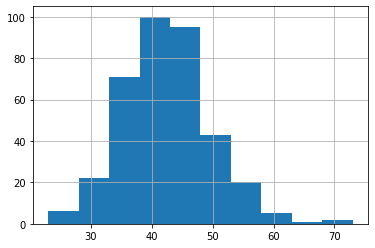

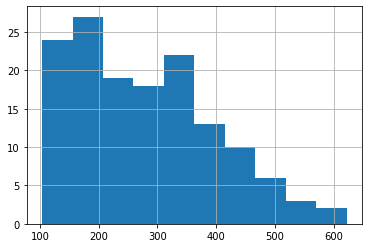

In [23]:
plotseries(female_births, 'Births')
plotseries(airline_passengers, 'Passengers')

Null Hypothesis: The data has a unit root i.e data is non-stationary

Alternative: Data does not have a unit root.



In [25]:
def dickey_fuller(data, col):
    result = adfuller(data[col])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [26]:
dickey_fuller(female_births, 'Births')
dickey_fuller(airline_passengers, 'Passengers')

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The Female births dataset is stationary and the airline passengers is non stationary.

### Different kinds of transformations that can be done:

1. Difference with lag of x.
2. difference with previous value (First differences)
3. Log transformation

## Teaser question

You flip a fair coin 576 times. Without using a calculator, calculate the probability of flipping at least 312 heads.


Solution:

Coin follows Binomial distribution with p=0.5.
Mean = np = 576x 0.5 = 288
Variance = np(1-p)= 576x 0.25 = 144
SD = 12

Coincidentally 312 is Mean + 2 * SD here. (95% falls within)
So According to normal distribution that would be 5%/2 = 2.5%.


### Stochastic Process:

family of random variables

$X_t$ ~ distribution($mean_t$, $var_t$)

Stationarity is a characteristic of the stochastic process.



To be added:

Auto